In [1]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.columns

'''
for i in df.columns:
    print(i)
''';

In [4]:
len(df)

181691

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType',
                       'target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace = True)
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
df = df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group',
                 'Target','Summary','Target_type','Weapon_type','Motive']]
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target,Summary,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Julio Guzman,NaN,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,"Nadine Chaval, daughter",NaN,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Employee,NaN,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,U.S. Embassy,NaN,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,U.S. Consulate,NaN,Government (Diplomatic),Incendiary,NaN


In [7]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target            636
Summary         66129
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target       181055 non-null  object 
 16  Summary      115562 non-null  object 
 17  Target_type  181691 non-null  object 
 18  Weapon_type  181691 non-

## Destructive Feature of Data

In [9]:
print("Country with the most attacks:", df['Country'].value_counts().idxmax())
print("City with the most attacks:", df['city'].value_counts().index[1])
print("Region with the most attacks:", df['Region'].value_counts().idxmax())
print("Year with the most attacks:", df['Year'].value_counts().idxmax())
print("Month with the most attacks:", df['Month'].value_counts().idxmax())
print("Group with the most attacks:", df['Group'].value_counts().index[1])
print("Most Attack Types:", df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [10]:
df_Turkey = df[df['Country']=='Turkey']
df_Turkey.head(3)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target,Summary,Target_type,Weapon_type,Motive
226,1970,4,25,Turkey,Istanbul,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0.0,0.0,EL AL Office,NaN,Palestinians,EL AL Office,NaN,Airports & Aircraft,Explosives,NaN
486,1970,8,31,Turkey,Ankara,Middle East & North Africa,Ankara,39.930771,32.767540,Bombing/Explosion,0.0,0.0,"TUSLOG Detachment 30, USAF",NaN,Turkish People's Liberation Army,"TUSLOG Detachment 30, USAF",NaN,Military,Explosives,NaN
531,1970,10,2,Turkey,Izmir,Middle East & North Africa,Izmir,38.395649,27.135641,Bombing/Explosion,0.0,0.0,U.S. Air Force Commissary,NaN,Turkish People's Liberation Front (TPLF)(THKP-C),U.S. Air Force Commissary,NaN,Military,Explosives,NaN


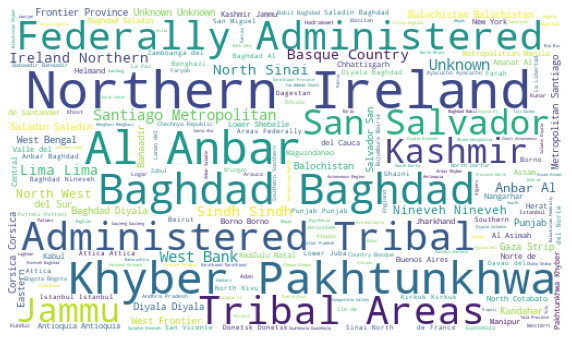

In [11]:
from wordcloud import WordCloud
from scipy import signal
cities = df.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                      width = 512,
                      height = 300).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [12]:
df['Year'].value_counts(dropna = False).sort_index(ascending=False)

2017    10900
2016    13587
2015    14965
2014    16903
2013    12036
2012     8522
2011     5076
2010     4826
2009     4721
2008     4805
2007     3242
2006     2758
2005     2017
2004     1166
2003     1278
2002     1333
2001     1906
2000     1814
1999     1395
1998      934
1997     3197
1996     3058
1995     3081
1994     3456
1992     5071
1991     4683
1990     3887
1989     4324
1988     3721
1987     3183
1986     2860
1985     2915
1984     3495
1983     2870
1982     2544
1981     2586
1980     2662
1979     2662
1978     1526
1977     1319
1976      923
1975      740
1974      581
1973      473
1972      568
1971      471
1970      651
Name: Year, dtype: int64

## Data Visualization

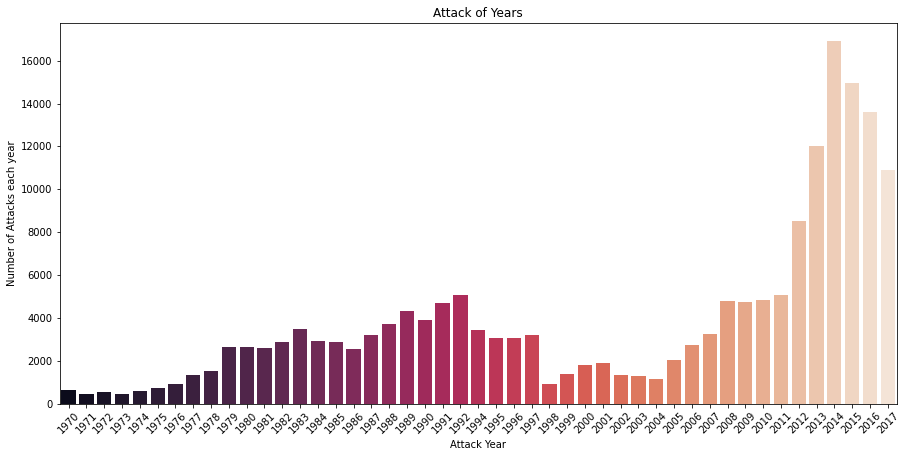

In [13]:
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize=(15,7))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack of Years')
plt.show()

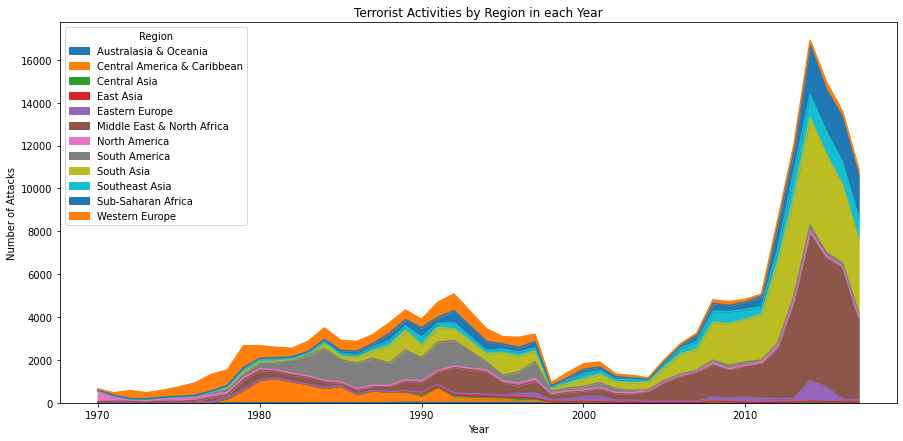

In [14]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,7))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [15]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

In [16]:
# Top 50 worst terror attacks 
attacks = df.sort_values(by='casualities',ascending=False)[:50]

In [17]:
heat = attacks.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace = True)
heat.head()

Year,1982,1984,1987,1992,1994,1995,1996,1997,1998,2001,...,2005,2006,2007,2008,2009,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0,0.0
Egypt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438.0
Ethiopia,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


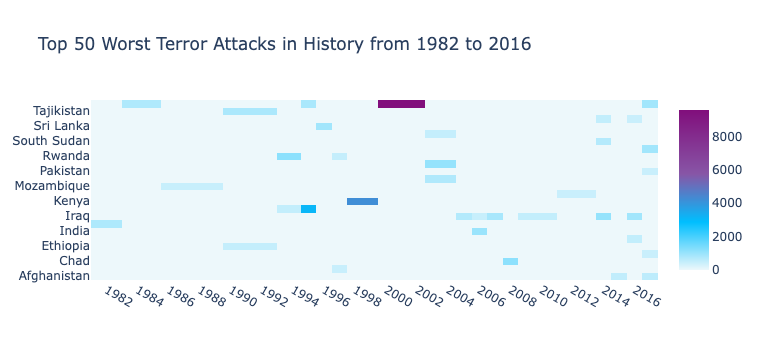

In [18]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'], [.6, '#8856a7'], [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]

layout = go.Layout(
    title = 'Top 50 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='',nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap', show_link=False)

In [19]:
print('TURKEY:', len(df_Turkey))
print('='*25)
df.Country.value_counts()[:15]

TURKEY: 4292


Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

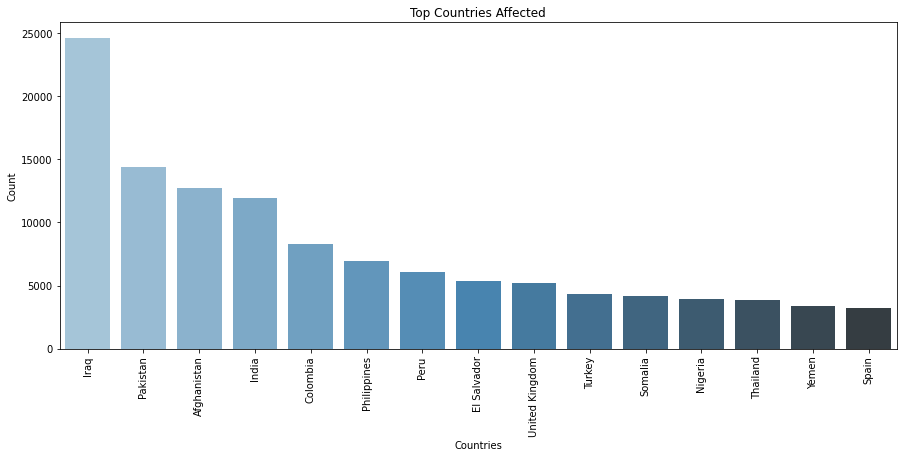

In [20]:
plt.subplots(figsize=(15,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [21]:
import folium
from folium.plugins import MarkerCluster

In [22]:
filterYear = df['Year'] == 1970

In [23]:
filterData = df[filterYear]
filterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         651 non-null    int64  
 1   Month        651 non-null    int64  
 2   Day          651 non-null    int64  
 3   Country      651 non-null    object 
 4   state        649 non-null    object 
 5   Region       651 non-null    object 
 6   city         651 non-null    object 
 7   latitude     643 non-null    float64
 8   longitude    643 non-null    float64
 9   AttackType   651 non-null    object 
 10  Killed       651 non-null    int64  
 11  Wounded      651 non-null    int64  
 12  Target       629 non-null    object 
 13  Summary      386 non-null    object 
 14  Group        651 non-null    object 
 15  Target       629 non-null    object 
 16  Summary      386 non-null    object 
 17  Target_type  651 non-null    object 
 18  Weapon_type  651 non-null    object 
 19  Motive  

In [24]:
reqFilterData = filterData.loc[:,'city':'longitude']
reqFilterData = reqFilterData.dropna()
reqFilterDataList = reqFilterData.values.tolist()

In [25]:
_map = folium.Map(location = [0,30],tiles='CartoDB positron',zoom_start=2)

markerCluster = folium.plugins.MarkerCluster().add_to(_map)
for point in range(0, len(reqFilterDataList)):
  folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                popup = reqFilterDataList[point][0]).add_to(markerCluster)
_map

In [26]:
df.Group.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

In [27]:
test = df[df.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [28]:
df_group = df.dropna(subset=['latitude','longitude'])
df_group = df_group.drop_duplicates(subset=['Country', 'Group'])

In [29]:
terrorist_groups = df['Group'].value_counts()[1:8].index.tolist()
df_group = df_group.loc[df_group.Group.isin(terrorist_groups)]
print(df_group.Group.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [30]:
_map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(_map)
for i in range(0,len(df_group)):
    folium.Marker([df_group.iloc[i]['latitude'],df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(df_group.iloc[i]['Group'], 
                  df_group.iloc[i]['Country'])).add_to(_map)
_map

In [31]:
m1 = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)
for i in range(0,len(df_group)):
    marker=folium.Marker([df_group.iloc[i]['latitude'],df_group.iloc[i]['longitude']]) 
    popup='Group:{}<br>Country:{}'.format(df_group.iloc[i]['Group'],
                                          df_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
    
marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.TileLayer('stamentoner').add_to(m1)
folium.LayerControl().add_to(m1)
m1

In [32]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,...,Wounded,Target,Summary,Group,Target,Summary,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,...,0,Julio Guzman,NaN,MANO-D,Julio Guzman,NaN,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),...,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,"Nadine Chaval, daughter",NaN,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,...,0,Employee,NaN,Unknown,Employee,NaN,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,...,0,U.S. Embassy,NaN,Unknown,U.S. Embassy,NaN,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,...,0,U.S. Consulate,NaN,Unknown,U.S. Consulate,NaN,Government (Diplomatic),Incendiary,NaN,0


In [33]:
# Total Number of people killed in terror attack
killData = df.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


In [34]:
attackData = df.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [35]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [36]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


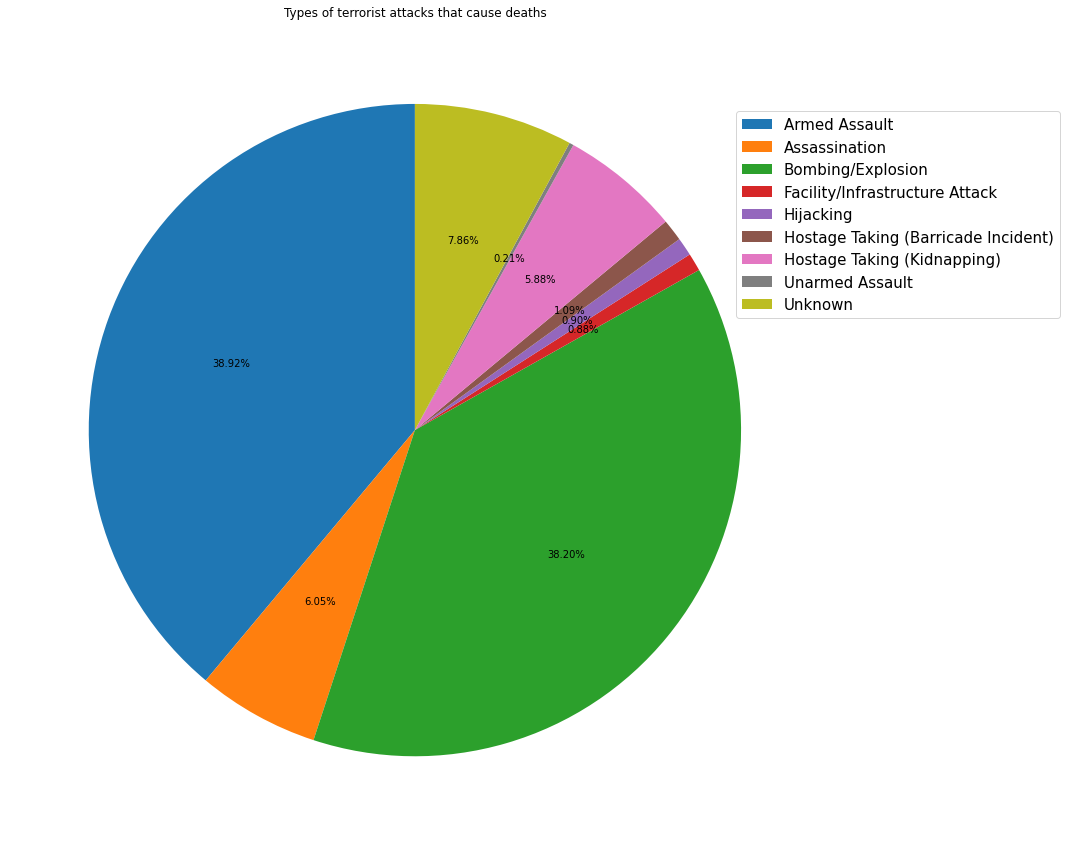

In [37]:
labels = typeKillFormatData.columns.tolist()
transpoze = typeKillFormatData.T
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15)
plt.show()

In [38]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [39]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [40]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

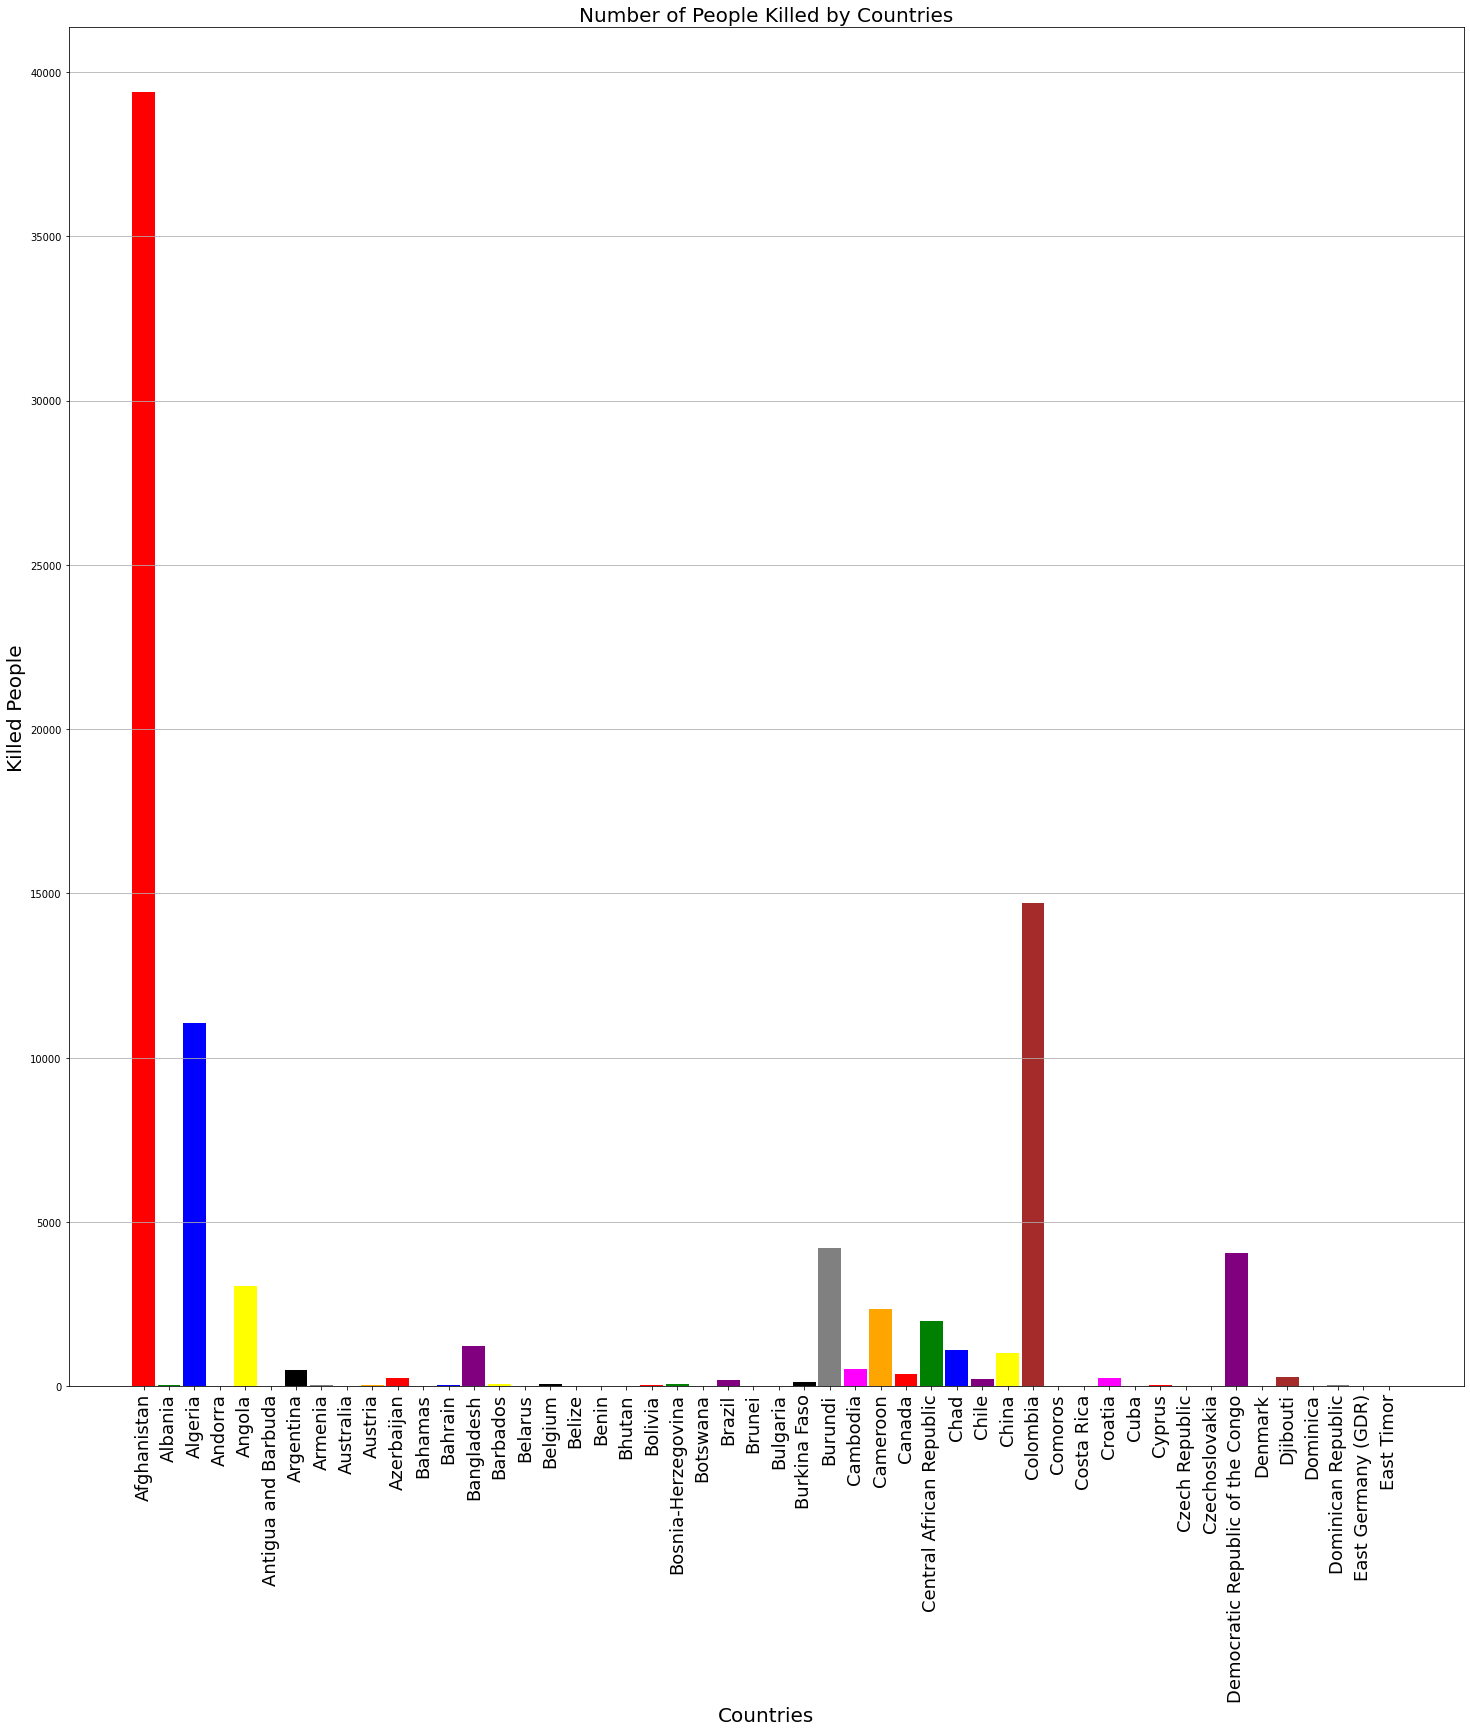

In [41]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] 
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of People Killed by Countries', fontsize = 20)
plt.show()

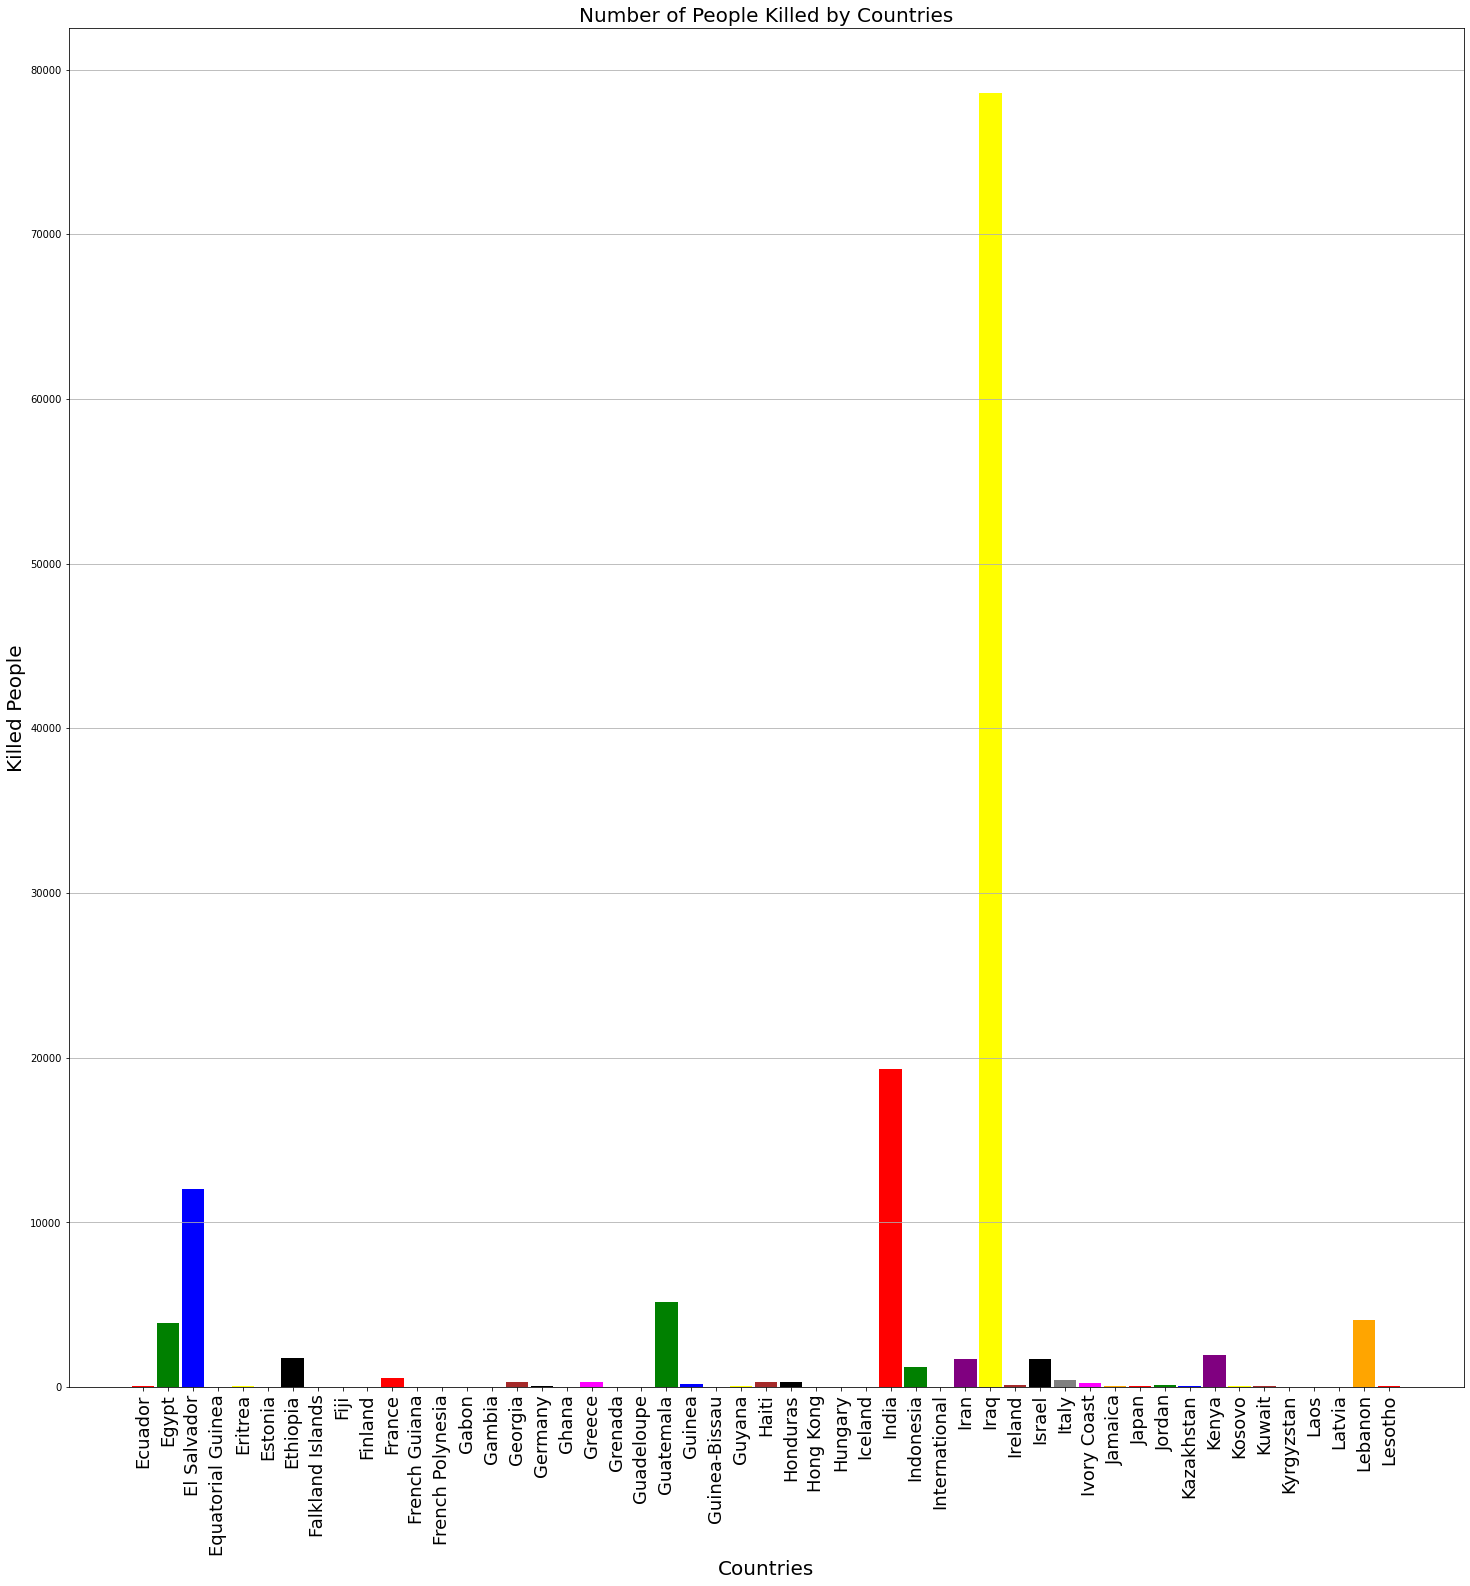

In [42]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of People Killed by Countries', fontsize = 20)
plt.show()

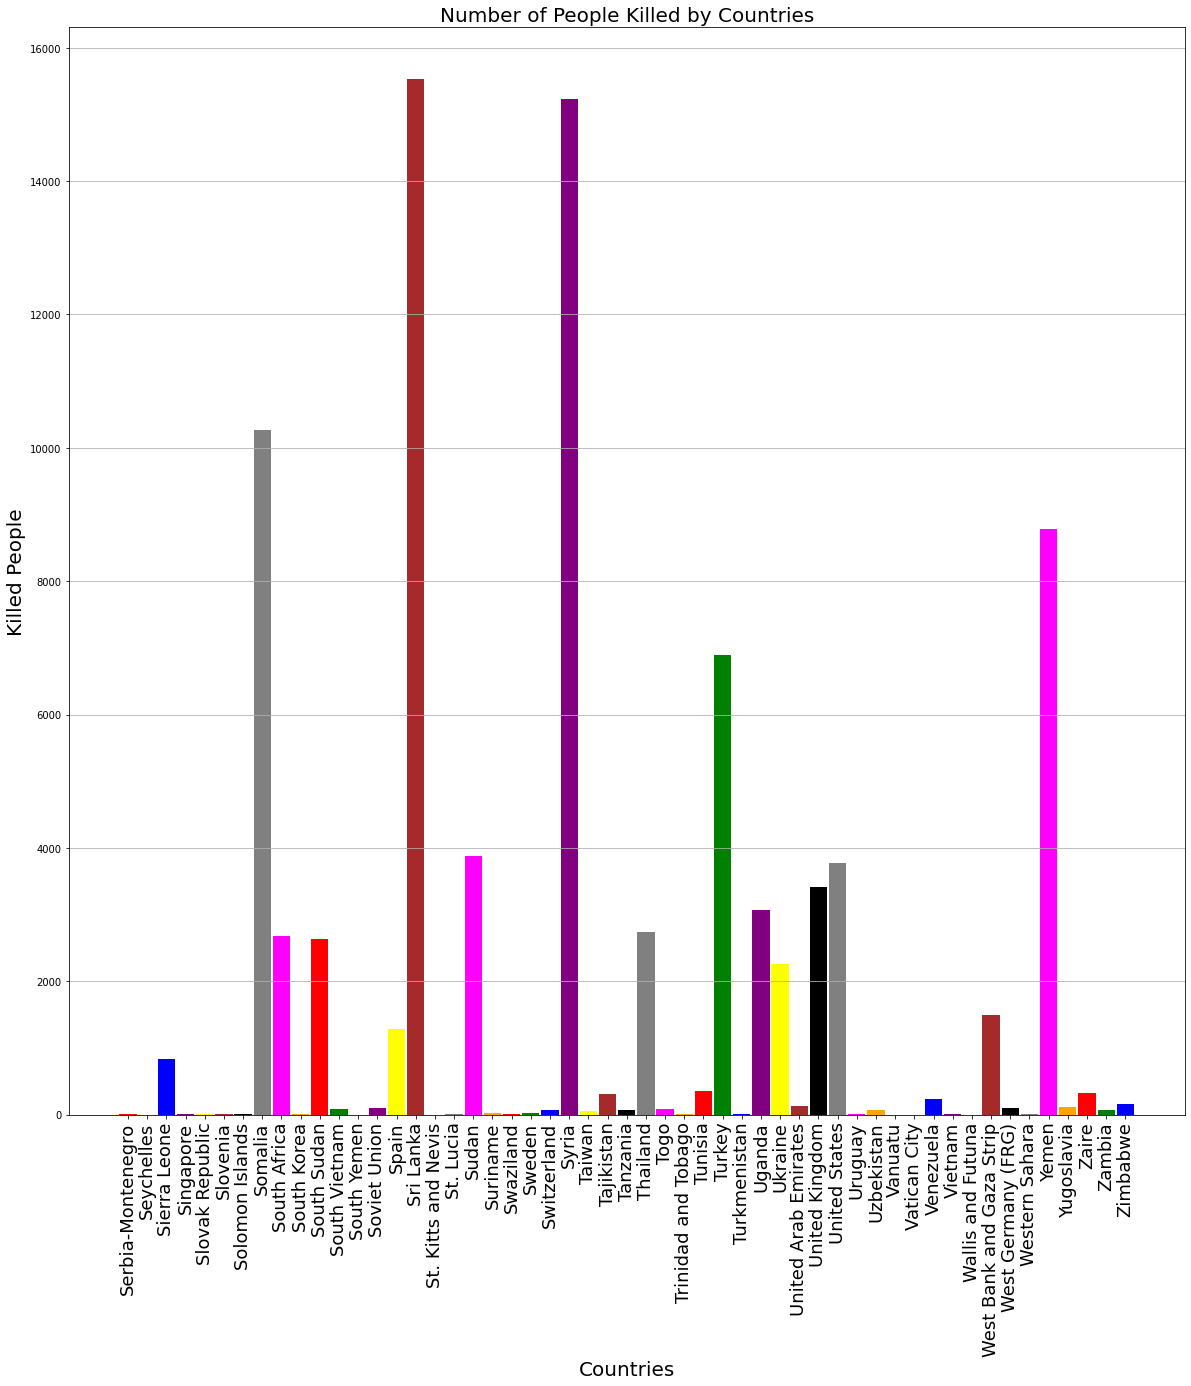

In [43]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of People Killed by Countries', fontsize = 20)
plt.show()